In [5]:
#run in colab since i have used the defalut sample example of mnist in colab
#if a part of a program is commented than there are some errors in the program
import numpy as np
import pandas as pd
!pip install sklearn

In [6]:
from matplotlib import pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
data=pd.read_csv(r"D:\MY_CAPTAIN\MACHINE_LEARNING_AUGUST_2020\mnist_train.csv")

In [8]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x=data.iloc[:,1:] # .values converts into a array instead of data frame
x

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y=data.iloc[:,:1]

In [11]:
y #storing all the lables in y variable

,label
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [12]:
#displaying on images
a=data.iloc[2,1:].values # .values makes it a array type datatype instead of data frame
a

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   

In [13]:
#now reshaping the pixle data to view it in matplotlib 
a=a.reshape(28,28).astype("uint8")

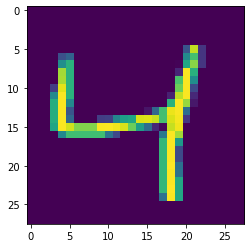

In [14]:
#plotting
plt.imshow(a)

In [15]:
#spliting data into train ,test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state=4)

In [16]:
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
20379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train

,label
20379,4
53032,4
27005,7
30510,8
508,1
...,...
55169,1
49861,4
27063,1
8366,8


# trying for 
- decision tree
- naive bayes algorithm
- k-nearest neighbor
- random forest 

# modeling the randomforest classifier

In [37]:
# modeling the randomforest classifier
rf=RandomForestClassifier(n_estimators=100)

# fitting the model
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(pred)

C:\Users\Siddesh Naik\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[2 7 6 ... 6 4 2]


In [38]:
print(y_test)

       label
41382      2
20883      7
13621      6
41823      1
33839      8
...      ...
34502      0
730        7
17814      6
37767      4
39655      2

[12000 rows x 1 columns]


In [39]:
#cheking a random value
print("lable:",y_test.iloc[3])
print("predicted value:",pred[3])

lable: label    1
Name: 41823, dtype: int64
predicted value: 1


In [40]:
count = 0
#checking predition accuracy
a=y_test.values
for i in range(len(x_test)):
    if pred[i]==a[i]:
        count=count+1

acc = (count/len(x_test))*100
print("accuracy:",acc)

accuracy: 96.90833333333333


In [41]:
test_set=pd.read_csv(r"D:\MY_CAPTAIN\MACHINE_LEARNING_AUGUST_2020\mnist_test.csv")
test_set

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test_set_x=test_set.iloc[:,1:]
test_set_x

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test_set_y=test_set.iloc[:,0]
test_set_y

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [45]:
pred = rf.predict(test_set_x)
print(pred)
count = 0
#checking predition accuracy
a=test_set_y.values
for i in range(len(test_set_x)):
    if pred[i]==a[i]:
        count=count+1

acc = (count/len(x_test))*100
print("accuracy:",acc)

[7 2 1 ... 4 5 6]
accuracy: 80.60000000000001


#modeling with decision tree classifier


In [22]:
#modeling with decision tree classifier
from sklearn import tree 
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
pred=dt.predict(x_test)

In [24]:
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [25]:
count = 0
#checking predition accuracy
a=y_test.values
for i in range(len(x_test)):
    if pred[i]==a[i]:
        count=count+1

acc = (count/len(x_test))*100
print("accuracy:",acc)

accuracy: 86.52499999999999


#naive bayes algorithm

In [26]:
#naive bayes algorithm
from sklearn import naive_bayes
#sklearn.naive_bayes.BernoulliNB
nbb=naive_bayes.BernoulliNB()
nbb.fit(x_train,y_train)
pred=nbb.predict(x_test)
count = 0
#checking predition accuracy
a=y_test.values
for i in range(len(x_test)):
    if pred[i]==a[i]:
        count=count+1

acc = (count/len(x_test))*100
print("accuracy:",acc)

C:\Users\Siddesh Naik\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy: 83.00833333333333


In [27]:
#naive_bayes.ComplementNB
nbc=naive_bayes.ComplementNB()
nbc.fit(x_train,y_train)
pred=nbc.predict(x_test)
count = 0
#checking predition accuracy
a=y_test.values
for i in range(len(x_test)):
    if pred[i]==a[i]:
        count=count+1

acc = (count/len(x_test))*100
print("accuracy:",acc)

C:\Users\Siddesh Naik\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy: 71.10833333333333


In [28]:
# naive_bayes.CategoricalNB
# nbc1=naive_bayes.CategoricalNB()
# nbc1.fit(x_train,y_train)
# pred=nbc1.predict(x_test)
# count = 0
# #checking predition accuracy
# a=y_test.values
# for i in range(len(x_test)):
#     if pred[i]==a[i]:
#         count=count+1

# acc = (count/len(x_test))*100
# print("accuracy:",acc)

In [29]:
# naive_bayes.GaussianNB()
nbg=naive_bayes.GaussianNB()
nbg.fit(x_train,y_train)
pred=nbg.predict(x_test)
count = 0
#checking predition accuracy
a=y_test.values
for i in range(len(x_test)):
    if pred[i]==a[i]:
        count=count+1

acc = (count/len(x_test))*100
print("accuracy:",acc)

C:\Users\Siddesh Naik\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy: 55.974999999999994


In [30]:
#naive_bayes.MultinomialNB()
# nbm=naive_bayes.MultinomialNB()
# nbm.fit(x_test,y_test)
# pred=nbm.predict(x_test)
# count = 0
# #checking predition accuracy
# a=y_test.values
# for i in range(len(x_test)):
#     if pred[i]==a[i]:
#         count=count+1

# acc = (count/len(x_test))*100
# print("accuracy:",acc)

# from sklearn import neighbors

In [31]:
# from sklearn import neighbors
# #neighbors.KNeighborsClassifier
# knc=neighbors.KNeighborsClassifier()
# knc.fit(x_train,y_train)
# pred=knc.predict(x_test)
# count = 0
# #checking predition accuracy
# a=y_test.values
# for i in range(len(x_test)):
#     if pred[i]==a[i]:
#         count=count+1

# acc = (count/len(x_test))*100
# print("accuracy:",acc)